# MAT 388, HW4

In [53]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras as ks

from keras.models import Sequential
from keras.layers import Dense, Activation   
from keras.datasets import mnist, fashion_mnist
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, LSTM, Embedding, SimpleRNN, RNN
from keras.utils import np_utils
from keras.callbacks import EarlyStopping

import tensorflow_datasets as tfds

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,  classification_report
from sklearn.feature_extraction.text import CountVectorizer

from scipy.io import loadmat
import urllib.request
import re

## Q1

For this question we are goint to use [CELEB_A](https://www.tensorflow.org/datasets/catalog/celeb_a) dataset through [tensorflow datasets](https://www.tensorflow.org/datasets).

1. Ingest the data, and select 10000 images from the dataset. Put the images under a variable called `X` and class labels (attributes) into `y`.
2. Build a neural network model for `X` against `Glasses` attribute in `y`.
3. Test the accuracy of your model using a 5-fold cross-validation. (I want a %95 confidence interval on the returned result using a t-test as I did in one of my lectures.)
4. Repeat Steps 2 and 3 for `Male` and `Bangs` attributes.
5. Compare your results for `Glasses`, `Male` and `Bangs`. Which one is better? Why? Explain.

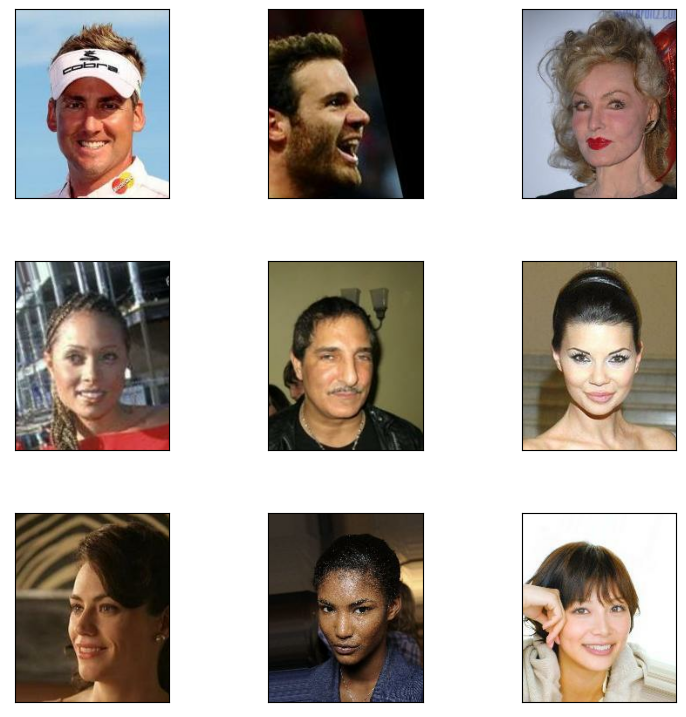

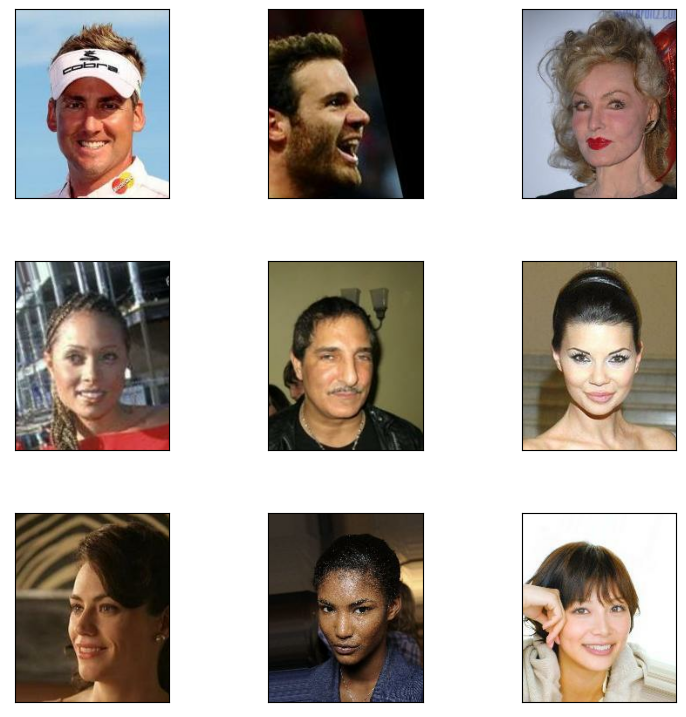

In [3]:
# Construct a tf.data.Dataset
(train, test), info = tfds.load('celeb_a', split = ['train', 'test'], data_dir = '/data/tensorflow_datasets/' , with_info = True, shuffle_files = True)
tfds.show_examples(train, info) 

In [4]:
X = train.shuffle(10000).batch(32).prefetch(tf.data.AUTOTUNE)
for example in X.take(1):
  X, y = example["image"], example["attributes"]

In [5]:
[x['attributes'] for x in train.take(2)]

[{'5_o_Clock_Shadow': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
  'Arched_Eyebrows': <tf.Tensor: shape=(), dtype=bool, numpy=True>,
  'Attractive': <tf.Tensor: shape=(), dtype=bool, numpy=True>,
  'Bags_Under_Eyes': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
  'Bald': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
  'Bangs': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
  'Big_Lips': <tf.Tensor: shape=(), dtype=bool, numpy=True>,
  'Big_Nose': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
  'Black_Hair': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
  'Blond_Hair': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
  'Blurry': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
  'Brown_Hair': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
  'Bushy_Eyebrows': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
  'Chubby': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
  'Double_Chin': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
  'Eyeglasses': <tf.Tensor: shape=(), dtype=b

In [6]:
def tfGetData(df,N,attr):
    X_train = []
    y_train = []
    fn = {True: 1, False: 0}
    for u in df.take(N):
        X_train.append(u['image'].numpy().reshape((218*178*3)))
        y_train.append(fn.get(u['attributes'][attr].numpy(),0))
    return X_train,y_train

In [7]:
X_train, y_train = tfGetData(train, 5000,'Eyeglasses')
X_test,y_test = tfGetData(test, 1000,'Eyeglasses')

model = Sequential()
model.add(Flatten())
model.add(Dense(256, activation='relu')) #256 neurons in a layer
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', 
              optimizer = 'adamax', 
              metrics = ['accuracy'])

In [8]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [9]:
model.fit(X_train, y_train,
          batch_size = 32,
          epochs = 15,
          validation_data = (X_test, y_test))

Epoch 1/15
157/157 [==============================] - 95s 596ms/step - loss: 239.8997 - accuracy: 0.8924 - val_loss: 28.8498 - val_accuracy: 0.9440
Epoch 2/15
157/157 [==============================] - 94s 600ms/step - loss: 69.9373 - accuracy: 0.9130 - val_loss: 38.7006 - val_accuracy: 0.8620
Epoch 3/15
157/157 [==============================] - 93s 590ms/step - loss: 67.4833 - accuracy: 0.9156 - val_loss: 41.7234 - val_accuracy: 0.9430
Epoch 4/15
157/157 [==============================] - 91s 579ms/step - loss: 29.7791 - accuracy: 0.9316 - val_loss: 19.0412 - val_accuracy: 0.9370
Epoch 5/15
157/157 [==============================] - 92s 587ms/step - loss: 36.3650 - accuracy: 0.9286 - val_loss: 73.3456 - val_accuracy: 0.7780
Epoch 6/15
157/157 [==============================] - 98s 626ms/step - loss: 63.3133 - accuracy: 0.9200 - val_loss: 20.0030 - val_accuracy: 0.9320
Epoch 7/15
157/157 [==============================] - 88s 559ms/step - loss: 26.7458 - accuracy: 0.9424 - val_loss: 3

In [10]:
X_train, y_train = tfGetData(train, 5000,'Bangs')
X_test,y_test = tfGetData(test, 1000,'Bangs')

model = Sequential()
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', 
              optimizer = 'adamax', 
              metrics = ['accuracy'])

In [11]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [12]:
model.fit(X_train, y_train,
          batch_size = 128,
          epochs = 10,
          validation_data = (X_test, y_test))

Epoch 1/10
40/40 [==============================] - 29s 683ms/step - loss: 2136.6597 - accuracy: 0.7474 - val_loss: 628.4156 - val_accuracy: 0.8450
Epoch 2/10
40/40 [==============================] - 27s 677ms/step - loss: 208.7006 - accuracy: 0.8308 - val_loss: 109.3242 - val_accuracy: 0.8950
Epoch 3/10
40/40 [==============================] - 27s 683ms/step - loss: 60.2854 - accuracy: 0.8846 - val_loss: 45.5403 - val_accuracy: 0.8850
Epoch 4/10
40/40 [==============================] - 26s 650ms/step - loss: 124.0024 - accuracy: 0.8362 - val_loss: 583.9329 - val_accuracy: 0.8450
Epoch 5/10
40/40 [==============================] - 24s 591ms/step - loss: 123.4521 - accuracy: 0.8604 - val_loss: 46.3034 - val_accuracy: 0.8920
Epoch 6/10
40/40 [==============================] - 24s 597ms/step - loss: 49.0535 - accuracy: 0.8842 - val_loss: 48.6006 - val_accuracy: 0.9080
Epoch 7/10
40/40 [==============================] - 24s 610ms/step - loss: 33.7295 - accuracy: 0.8956 - val_loss: 29.9254 

In [18]:
X_train, y_train = tfGetData(train, 5000,'Male')
X_test,y_test = tfGetData(test, 1000,'Male')

model = Sequential()
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', 
              optimizer = 'adamax', 
              metrics = ['accuracy'])

In [20]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [21]:
model.fit(X_train, y_train,
          batch_size = 32,
          epochs = 15,
          validation_data = (X_test, y_test))

Epoch 1/15
157/157 [==============================] - 91s 552ms/step - loss: 534.9224 - accuracy: 0.6638 - val_loss: 209.5790 - val_accuracy: 0.7320
Epoch 2/15
157/157 [==============================] - 82s 519ms/step - loss: 143.0474 - accuracy: 0.7574 - val_loss: 48.1816 - val_accuracy: 0.8660
Epoch 3/15
157/157 [==============================] - 82s 518ms/step - loss: 119.9481 - accuracy: 0.7796 - val_loss: 86.3678 - val_accuracy: 0.7950
Epoch 4/15
157/157 [==============================] - 81s 514ms/step - loss: 88.2448 - accuracy: 0.7976 - val_loss: 139.5984 - val_accuracy: 0.7030
Epoch 5/15
157/157 [==============================] - 81s 515ms/step - loss: 93.0806 - accuracy: 0.7864 - val_loss: 33.7730 - val_accuracy: 0.8790
Epoch 6/15
157/157 [==============================] - 84s 533ms/step - loss: 44.1803 - accuracy: 0.8352 - val_loss: 54.6692 - val_accuracy: 0.7470
Epoch 7/15
157/157 [==============================] - 82s 520ms/step - loss: 20.2223 - accuracy: 0.8620 - val_los

In [22]:
model.fit(X_train, y_train,
          batch_size = 128,
          epochs = 10,
          validation_data = (X_test, y_test))

Epoch 1/10
40/40 [==============================] - 25s 624ms/step - loss: 3.8089 - accuracy: 0.9114 - val_loss: 5.2567 - val_accuracy: 0.8900
Epoch 2/10
40/40 [==============================] - 25s 617ms/step - loss: 1.9285 - accuracy: 0.9448 - val_loss: 3.8890 - val_accuracy: 0.9060
Epoch 3/10
40/40 [==============================] - 24s 598ms/step - loss: 1.6822 - accuracy: 0.9430 - val_loss: 3.5380 - val_accuracy: 0.9130
Epoch 4/10
40/40 [==============================] - 24s 610ms/step - loss: 3.4630 - accuracy: 0.9110 - val_loss: 5.7314 - val_accuracy: 0.8870
Epoch 5/10
40/40 [==============================] - 28s 709ms/step - loss: 2.9487 - accuracy: 0.9116 - val_loss: 3.8365 - val_accuracy: 0.9050
Epoch 6/10
40/40 [==============================] - 25s 615ms/step - loss: 1.7473 - accuracy: 0.9404 - val_loss: 3.7077 - val_accuracy: 0.9150
Epoch 7/10
40/40 [==============================] - 24s 609ms/step - loss: 2.1257 - accuracy: 0.9254 - val_loss: 5.3948 - val_accuracy: 0.8860

For neural network models there is always input and output layers. But one of the biggest problem is we should decide that how many hidden layers and how many perceptron for each layer we will use.

Since hidden layers are arbitrary to choose, i chose 2 layers in our model. Maybe first layers will pick up edges of faces and second layers will pick up some patterns. We don't know what is happening in those layers.

Also some terms like epochs and batch size are important. When we have big dataset we can't give all data to the computer at once. To solve this problem, we can divide our dataset into smaller sizes and give it to our computer one by one. At the end of each iterations, computer can update the weights of the neural networks to find best fit model.

But how should we find right epoch number is question mark. It can change up to our dataset. Maybe if i would work more with neural network models, i could have decided intuitively but in this question i took epoch number as 10 and 15. Maybe i should have taken bigger numbers but i am not sure.

We have 10000 examples and if we take batches as 50 and divide our dataset then it will take 2000 iterations to complete 1 epoch. As i see in other code examples, batch size are taken as multiplies of 8 like 32 or 128 mostly. That is why i tried both these numbers as a batch size of our model.

Also i used relu (rectified linear unit) and sigmoid activation function and as an optimizer i used adam optimizer in our model and i guess it didn't give so bad results so it is okay.

Actually at first, i tried with an 2000 instances and everyting worked fine. Then i changed and took 10000 instances for train test and it gave good accuracy for Eyeglasses class and i was trying to get result for others, too. But because it is a huge data, i got some errors, my computer has just stopped working, it gave memory error etc. That is why, i put smaller number of instances.

If we look at Eyeglasses, Male and Bangs model's result, it seems when we put epoch as 10, batch size as 128 model gives better accuracy but i guess other model with 15 eppoch and 32 batch size seems better, because accuricies are closer to each other.


## Q2

For this question use the [Hyperspectral Image of Kennedy Space Center](https://www.ehu.eus/ccwintco/index.php/Hyperspectral_Remote_Sensing_Scenes#Kennedy_Space_Center_.28KSC.29).


1. Ingest the image data directly from the web. (No local files!)
2. Ingest the ground truth data directly from the web. (No local files!)
4. Build a convolutional neural network (preferably using [this](https://keras.io/api/layers/convolution_layers/) and/or [this](https://keras.io/api/layers/recurrent_layers/conv_lstm2d/)) model.
5. Test the accuracy of the model using a 5-fold cross-validation. (I want a %95 confidence interval on the returned result using a t-test as I did in one of my lectures.)

In [25]:
ksc_url = "https://www.ehu.eus/ccwintco/uploads/2/26/KSC.mat"
urllib.request.urlretrieve(ksc_url, "ksc_data.mat")
ksc =  loadmat("ksc_data.mat")

In [26]:
ksc_gt_url = "https://www.ehu.eus/ccwintco/uploads/a/a6/KSC_gt.mat"
urllib.request.urlretrieve(ksc_gt_url, "ksc_gt.mat")
ksc_gt =  loadmat("ksc_gt.mat")

In [29]:
ksc['KSC']

array([[[ 11,  26,  19, ...,  63,  64,  58],
        [  4,  22,  10, ...,  38,  44,  43],
        [  6,  16,   9, ...,  48,  47,  49],
        ...,
        [ 28,  44,  32, ...,  38,  56,  46],
        [ 28,  37,  31, ...,  39,  42,  31],
        [ 17,  37,  27, ...,  35,  39,  34]],

       [[  7,  24,  16, ...,  63,  63,  55],
        [  4,  23,  14, ...,  56,  58,  49],
        [  9,  20,  12, ...,  48,  50,  46],
        ...,
        [ 24,  37,  29, ...,  28,  39,  37],
        [ 21,  40,  25, ...,  39,  45,  37],
        [ 17,  38,  24, ...,  42,  36,  40]],

       [[ 11,  22,  17, ...,  65,  63,  58],
        [ 15,  34,  19, ...,  66,  77,  64],
        [  4,  20,  12, ...,  44,  49,  42],
        ...,
        [ 19,  40,  27, ...,  35,  39,  34],
        [ 23,  36,  24, ...,  42,  36,  28],
        [ 26,  40,  32, ...,  24,  30,  31]],

       ...,

       [[ 43,  65,  59, ..., 109, 117, 107],
        [ 45,  67,  61, ..., 116, 117, 113],
        [ 14,  36,  28, ...,  67,  66,  57

In [33]:
ksc_gt['KSC_gt']

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [36]:
model = ks.Sequential()

model.add(ks.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(ks.layers.MaxPooling2D((2, 2)))
model.add(ks.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(ks.layers.MaxPooling2D((2, 2)))
model.add(ks.layers.Flatten())
model.add(ks.layers.Dense(128, activation='relu'))
model.add(ks.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, shuffle=True)

accuracy_scores = []

for train_index, test_index in kfold.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]

    model.fit(X_train_fold, y_train_fold, epochs=10)

    accuracy_scores.append(model.evaluate(X_val_fold, y_val_fold)[1])

mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

Epoch 1/10


ValueError: in user code:

    File "c:\Users\duygu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\duygu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\duygu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\duygu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\duygu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\duygu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\input_spec.py", line 232, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_6' (type Sequential).
    
    Input 0 of layer "max_pooling2d_2" is incompatible with the layer: expected ndim=4, found ndim=3. Full shape received: (None, 614, 176)
    
    Call arguments received by layer 'sequential_6' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 614, 176), dtype=uint16)
      • training=True
      • mask=None


Unfortunalety, i could not manage to test the accuracy of the model.

## Q3

For this question we are going to use the time series of [Wheat Futures](https://finance.yahoo.com/quote/ZW=F/) from Yahoo Finance.

1. Ingest the data using [yfinance](https://pypi.org/project/yfinance/) Start from Jan 1, 2010 until Dec 31, 2021.
2. Construct [a RNN and/or a LSTM](https://keras.io/api/layers/recurrent_layers/) model on the data.
3. Test your model on the wheat futures data from Jan 1, 2022 to today using a 5-fold cross-validation. Did your model work? Explain.

In [226]:
import yfinance as yf

# Download the wheat futures
wheat_futures = yf.download("ZW=F", start="2010-01-01", end="2021-12-31")
wheat_futures

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ZW=F: No data found for this date range, symbol may be delisted


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [57]:
def load_data(data,T):
    N = data.shape[0]
    raw = data.to_numpy().reshape(N,1,)
    Y_train = raw[1:N-T]
    X_train = raw[:N-T-1]
    Y_test = raw[N-T:]
    X_test = raw[N-T-1:N-1]
    return X_train,X_test,Y_train,Y_test

In [58]:
X_train,X_test,Y_train,Y_test = load_data(wheat_futures['Open'],12)

In [59]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(1,1)))
model.add(Dropout(0.1))
model.add(Dense(100, activation='relu')) #100 neurons in a layer
model.add(Dropout(0.05))
model.add(Dense(1, activation = 'relu'))

model.compile(loss='mape', optimizer='adam', metrics = ['mse'])

In [ ]:
model.fit(X_train,Y_train, epochs=100, batch_size=5, validation_data=(X_test, Y_test), verbose=1)

In [ ]:
Y_pred = model.predict(X_test)
res = pd.DataFrame({'X_test': X_test.reshape(X_test.shape[0]), 
                    'Y_test': Y_test.reshape(Y_test.shape[0]), 
                    'Y_pred': Y_pred.reshape(Y_pred.shape[0])})
res

In [ ]:
model.evaluate(X_test, Y_test, batch_size = 32) 

In [ ]:
res.plot()

Actually, i don't know why ingesting the data didn't work here but when i take all these codes to google colab, it worked. Also in my sister's computer, these codes worked and give a result at the end. 

So, i thought, even if i can not see the results here, it will work when you control these codes in your computer. But i can make my explanation about the model that i got in google colab. 

Since our data has 3018 rows × 6 columns, it is not that large relative to other datasets. That is why, when i'm fitting to model, i chose batch size smaller and epoch size as 10.

I decided to construct LSTM(long term short memory) model. Time series has to remember past and LSTM remembers what happened before. That is why, lstm seems a good choice. Normally it takes time when data is large but since our data is not that large, it won't be a problem.

After getting plot, we can see that it gives a similar line, but like stock prices prediction, we should not trust the prediction results. Even if we get the model, prediction in these kind of datas can not be trusted.

Also, we can not apply on 5-fold cross-validation in that question since it is time series. And if we try to use 5-fold cross-validation, the order of time will be confused. So, we will not use in that question.

## Q4

For this question, we are going to use [Consumer Complaints Dataset](https://raw.githubusercontent.com/plotly/datasets/master/26k-consumer-complaints.csv).

1. Ingest the dataset. We are only going to use the columns `Issue` and `Timely Response?`.
2. Convert the values in the issue column to vectors using [Count Vectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) from `scikit-learn`. Similarly, binarize the column `Timely Response` using [Label Binarizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html).
3. Split your dataset into train and test.
3. Construct an an appropriate neural network model on the train set.
4. Test your model on the test set. Did your model work? Explain.

In [47]:
consumer_complaints = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/26k-consumer-complaints.csv')
consumer_complaints.columns

Index(['Unnamed: 0', 'Complaint ID', 'Product', 'Sub-product', 'Issue',
       'Sub-issue', 'State', 'ZIP code', 'Date received',
       'Date sent to company', 'Company', 'Company response',
       'Timely response?', 'Consumer disputed?'],
      dtype='object')

In [48]:
consumer_comp = consumer_complaints[["Issue", "Timely response?"]]
consumer_comp

,Issue,Timely response?
0,Communication tactics,Yes
1,Cont'd attempts collect debt not owed,Yes
2,"Application, originator, mortgage broker",Yes
3,Other,Yes
4,Cont'd attempts collect debt not owed,Yes
...,...,...
28151,Cont'd attempts collect debt not owed,Yes
28152,Taking out the loan or lease,Yes
28153,"Loan servicing, payments, escrow account",Yes
28154,Can't stop charges to bank account,Yes


In [49]:
consumer_comp.rename(columns = {'Issue':'issue', 'Timely response?':'timely_response'}, inplace = True)

C:\Users\duygu\AppData\Local\Temp\ipykernel_10140\708484994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumer_comp.rename(columns = {'Issue':'issue', 'Timely response?':'timely_response'}, inplace = True)


In [50]:
consumer_comp["timely_response"].value_counts()

Yes    27444
No       712
Name: timely_response, dtype: int64

In [51]:
consumer_comp.issue.dtype

dtype('O')

In [52]:
consumer_comp['issue'] = consumer_comp['issue'].astype(str)

C:\Users\duygu\AppData\Local\Temp\ipykernel_10140\2621315182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumer_comp['issue'] = consumer_comp['issue'].astype(str)


In [55]:
def rid_of_specials(words):
    new= ''
    for i in range(len(str(words))):
        a = re.sub('[^A-Za-z]+', ' ', str(words[i])).lower()
        new += a
    return new

# we have applied rid_of_specials to issue column in our dataset
consumer_comp['issue'] = consumer_comp.apply(lambda row: rid_of_specials(row['issue']), axis=1)  
# we will specify the axis = 1 to tell the .apply() method that we want to apply it on the 'rows' 'instead of' columns
 
consumer_comp

C:\Users\duygu\AppData\Local\Temp\ipykernel_10140\1083861979.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumer_comp['issue'] = consumer_comp.apply(lambda row: rid_of_specials(row['issue']), axis=1)


,issue,timely_response
0,communication tactics,Yes
1,cont d attempts collect debt not owed,Yes
2,application originator mortgage broker,Yes
3,other,Yes
4,cont d attempts collect debt not owed,Yes
...,...,...
28151,cont d attempts collect debt not owed,Yes
28152,taking out the loan or lease,Yes
28153,loan servicing payments escrow account,Yes
28154,can t stop charges to bank account,Yes


In [56]:
from nltk.tokenize import word_tokenize
tokenized = [word_tokenize(i) for i in consumer_comp['issue']]
consumer_comp

,issue,timely_response
0,communication tactics,Yes
1,cont d attempts collect debt not owed,Yes
2,application originator mortgage broker,Yes
3,other,Yes
4,cont d attempts collect debt not owed,Yes
...,...,...
28151,cont d attempts collect debt not owed,Yes
28152,taking out the loan or lease,Yes
28153,loan servicing payments escrow account,Yes
28154,can t stop charges to bank account,Yes


In [57]:
import nltk
from nltk.corpus import stopwords
#Step 1
stop_words = set(stopwords.words('english'))
#Step 2
stopped = [[i for i in j if i not in stop_words] for j in tokenized]
consumer_comp

,issue,timely_response
0,communication tactics,Yes
1,cont d attempts collect debt not owed,Yes
2,application originator mortgage broker,Yes
3,other,Yes
4,cont d attempts collect debt not owed,Yes
...,...,...
28151,cont d attempts collect debt not owed,Yes
28152,taking out the loan or lease,Yes
28153,loan servicing payments escrow account,Yes
28154,can t stop charges to bank account,Yes


In [186]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmatized = [[lemmatizer.lemmatize(i) for i in j] for j in stopped]
prepeared_sentence= [' '.join(j) for j in lemmatized]
consumer_comp['Lyrics_Processed'] = prepeared_sentence
consumer_comp

C:\Users\duygu\AppData\Local\Temp\ipykernel_1856\23446630.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumer_comp['Lyrics_Processed'] = prepeared_sentence


,issue,timely_response,Lyrics_Processed
0,communication tactics,Yes,communication tactic
1,cont d attempts collect debt not owed,Yes,cont attempt collect debt owed
2,application originator mortgage broker,Yes,application originator mortgage broker
3,other,Yes,
4,cont d attempts collect debt not owed,Yes,cont attempt collect debt owed
...,...,...,...
28151,cont d attempts collect debt not owed,Yes,cont attempt collect debt owed
28152,taking out the loan or lease,Yes,taking loan lease
28153,loan servicing payments escrow account,Yes,loan servicing payment escrow account
28154,can t stop charges to bank account,Yes,stop charge bank account


In [188]:
from sklearn.feature_extraction.text import CountVectorizer
#Step 1
vectorizer = CountVectorizer()
#Step 2
X = vectorizer.fit_transform(prepeared_sentence)
#Step 3
feature_names = vectorizer.get_feature_names_out()
#Step 4
lyrics_vectorized = pd.DataFrame(X.toarray(), columns = feature_names)

In [202]:
tmp = list(consumer_comp['issue'])
sentences = [re.sub(r'[^a-zA-Z\ ]','', X.decode('utf8')) for X in tmp]
vc = CountVectorizer(lowercase=True)
vc.fit(sentences)

AttributeError: 'str' object has no attribute 'decode'

In [148]:
vectorizer = CountVectorizer(lowercase=True)
X = vectorizer.fit_transform(consumer_comp['issue'].values.astype('str'))  ## Even astype(str) would work
X.shape

(28156, 188)

In [215]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(consumer_comp['issue'])
vectorizer.get_feature_names_out()

array(['account', 'acct', 'action', 'adding', 'advance', 'advertising',
       'amount', 'amt', 'an', 'and', 'application', 'applied', 'apply',
       'apr', 'arbitration', 'are', 'atm', 'attempts', 'available',
       'balance', 'bank', 'bankruptcy', 'being', 'billing', 'broker',
       'by', 'can', 'cancelling', 'card', 'cash', 'caused', 'changes',
       'charged', 'charges', 'check', 'checks', 'closing', 'collect',
       'collection', 'communication', 'company', 'cont', 'contact',
       'convenience', 'costs', 'credit', 'credited', 'customer',
       'damaged', 'day', 'dealing', 'debit', 'debt', 'decision',
       'decrease', 'delay', 'delinquent', 'deposits', 'destroyed',
       'determination', 'did', 'didn', 'disclosure', 'disclosures',
       'disputes', 'embezzlement', 'escrow', 'excessive', 'exchange',
       'expect', 'false', 'features', 'fee', 'fees', 'for', 'forbearance',
       'foreclosure', 'fraud', 'funds', 'get', 'getting', 'identity',
       'illegal', 'improper',

In [216]:
binarizer = LabelBinarizer()
Y = binarizer.fit_transform(consumer_comp['timely_response'])
Y.shape

(28156, 1)

In [217]:
X_test, X_train, Y_test, Y_train = train_test_split(X, Y,train_size=0.8)

In [221]:
X_test.shape

(22524, 188)

In [222]:
Y_test.shape

(22524, 1)

In [218]:
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(SimpleRNN(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='linear'))

early = EarlyStopping(monitor = "val_loss", mode = "min", patience = 4)
callbacks_list = [early]
    
model.compile(loss = 'mape', optimizer = 'adam', metrics = ['mse'])

In [223]:
X_test

<22524x188 sparse matrix of type '<class 'numpy.int64'>'
	with 101931 stored elements in Compressed Sparse Row format>

In [219]:
model.fit(X_train, Y_train,
          batch_size = 128,
          epochs = 15,
          validation_data = (X_test, Y_test))

InvalidArgumentError: {{function_node __wrapped__SerializeManySparse_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[2] = [0,108] is out of order. Many sparse ops require sorted indices.
    Use `tf.sparse.reorder` to create a correctly ordered copy.

 [Op:SerializeManySparse]

In [ ]:
Y_pred = model.predict(X_test).argmax(axis=1)
YY_test = Y_test.argmax(axis=1)
confusion_matrix(YY_test,Y_pred)

In [ ]:
print(classification_report(YY_test,Y_pred))

While CNN are good for image recognitions, RNN is mainly for natural language processing.
So for NLP, RNN it will be better solution model.
However, LSTM is a special version of RNN which solves short term memory problem.
That is why, i have decided to use LSTM model.

Before the model, i wanted to use my old codes for nltp processs to get better model. But at the end it did not work and i couldn't solve the problem for Compressed Sparse Row format. 